# Graph ploting with Model 5

Comparision between predicted and actual values graph code:

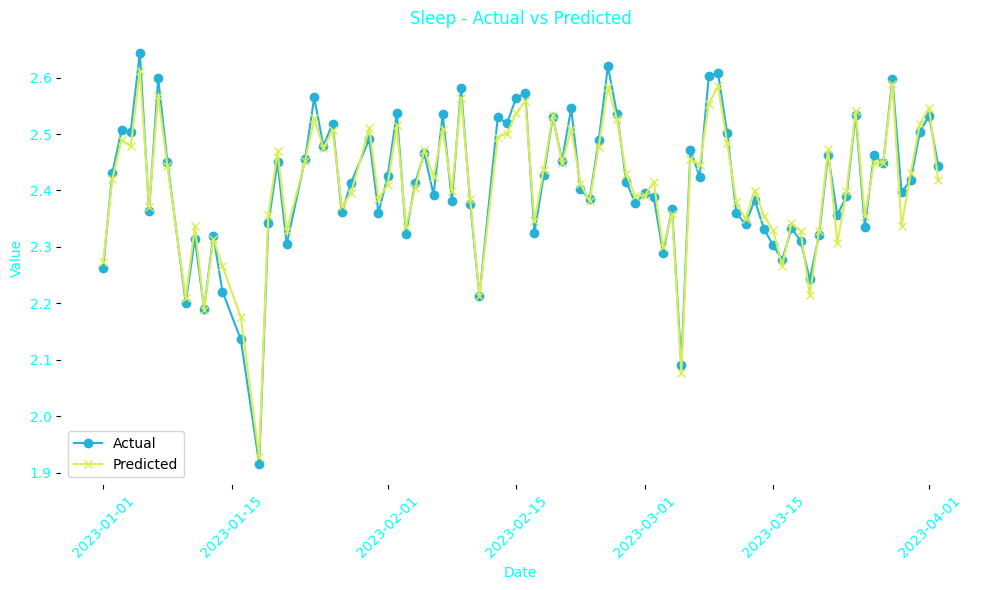

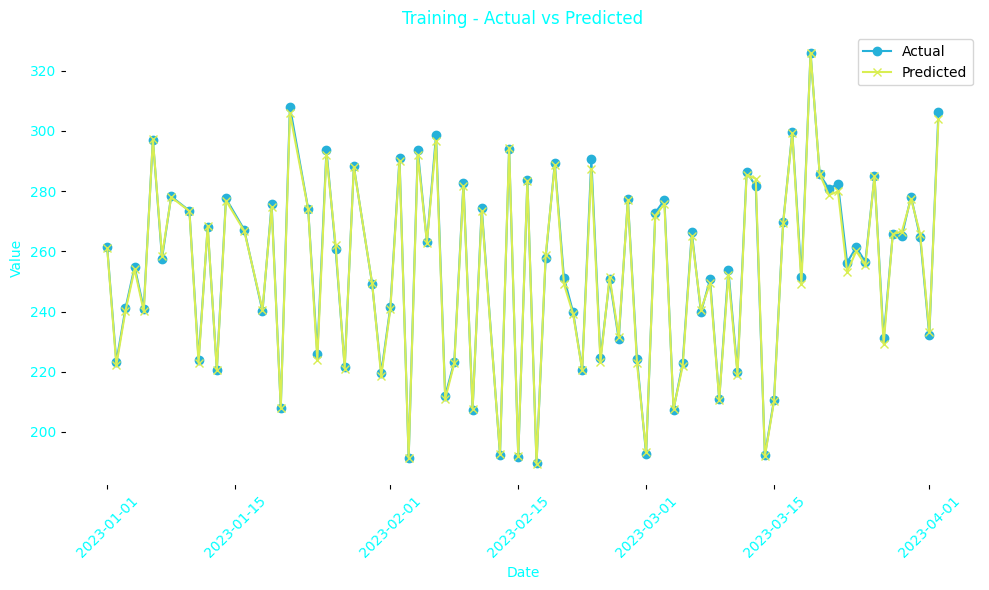

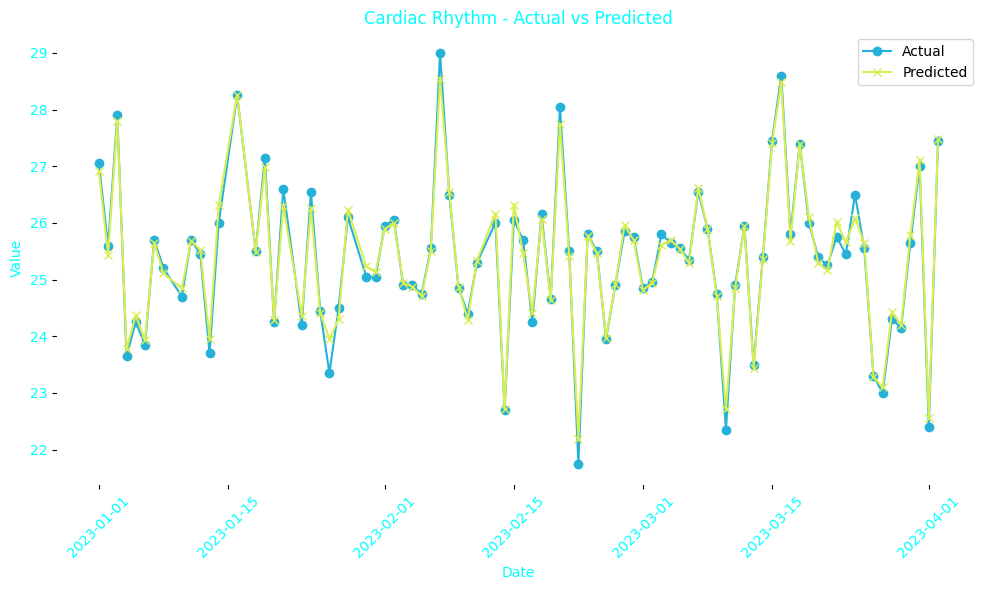

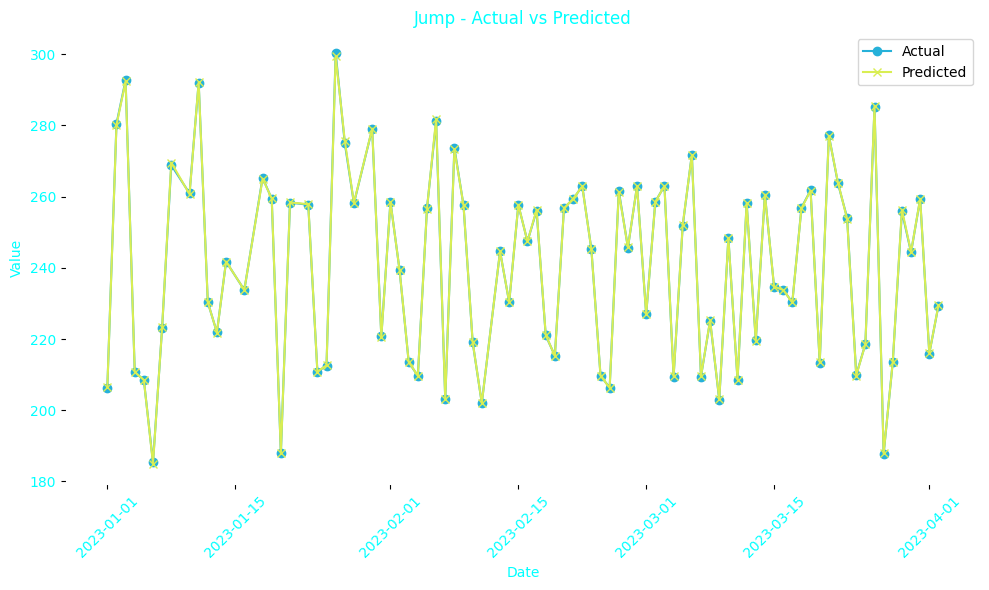

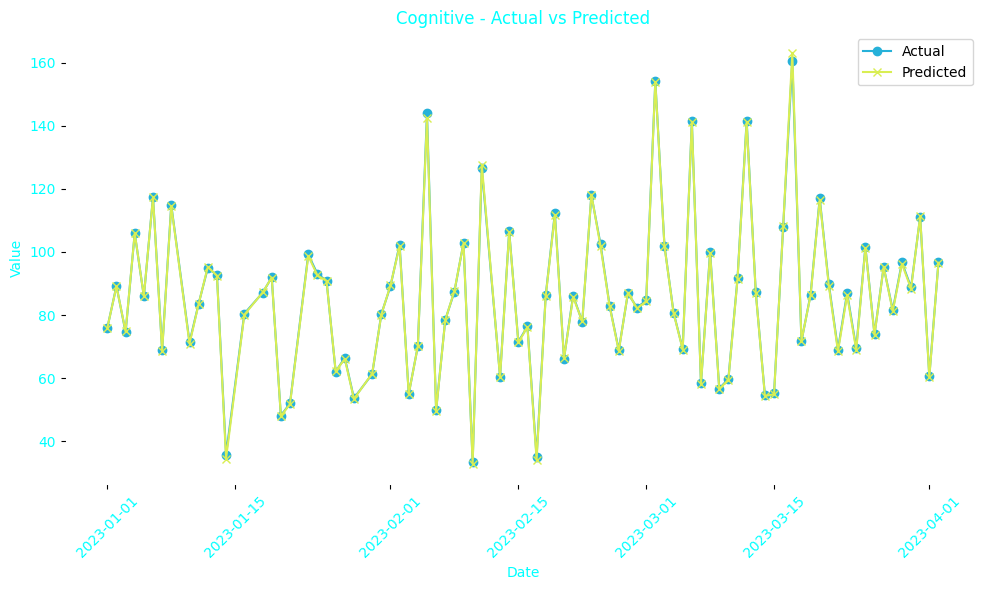

In [2]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

def regressionModelEvaluation(x_train, y_train, x_test, y_test, dates, y_pred=None, method=""):
    # Initialize XGBoost regressor
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=0)

    # Initialize Random Forest regressor
    rf_model = RandomForestRegressor(random_state=0)

    # Initialize Gradient Boosting regressor
    gb_model = GradientBoostingRegressor(random_state=0)

    # Train the models
    xgb_model.fit(x_train, y_train)
    rf_model.fit(x_train, y_train)
    gb_model.fit(x_train, y_train)

    # Make predictions if y_pred is not provided
    if y_pred is None:
        y_pred_xgb = xgb_model.predict(x_test)
        y_pred_rf = rf_model.predict(x_test)
        y_pred_gb = gb_model.predict(x_test)
        y_pred = (y_pred_xgb + y_pred_rf + y_pred_gb) / 3  # Average predictions from all models

    # Evaluate predictions
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return mse, mae, r2, y_test, y_pred

# Load your dataset
df = pd.read_csv("imputed_data_b.csv")

# Convert "Date" column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Specify the athlete player and date range for prediction
athlete_player = 21
start_date = pd.to_datetime("1/1/2023", format='%m/%d/%Y')
end_date = pd.to_datetime("04/02/2023", format='%m/%d/%Y')

# Filter the dataset for prediction
prediction_df = df[(df['Athlete'] == athlete_player) & (df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Filter the dataset for training
training_df = df[(df['Date'] < start_date)]

# Define blue neon color
neon_blue = '#00FFFF'
light='#d9ee53'
dark= '#26B1D9'
# Iterate over each column to predict and evaluate
for column in ["Sleep", "Training", "Cardiac Rhythm", "Jump", "Cognitive"]:
    # Separate features and target variable for prediction
    X_pred = prediction_df.drop([column, "Date", "Athlete"], axis=1)
    y_pred = prediction_df[column]
    dates_pred = prediction_df["Date"]

    # Use 100% of the training data for training
    X_train = training_df.drop([column, "Date", "Athlete"], axis=1)
    y_train = training_df[column]

    # Call the evaluation function for the current column
    mse, mae, r2, y_test, y_pred = regressionModelEvaluation(X_train, y_train, X_pred, y_pred, dates_pred, method=f"Ensemble (XGBoost + Random Forest + Gradient Boosting) - {column}")
##8a2964
##ab3067
    # Plot actual and predicted values for the current modality
    plt.figure(figsize=(10, 6))
    plt.plot(dates_pred, y_test, label='Actual', marker='o', linestyle='-',color= dark)
    plt.plot(dates_pred, y_pred, label='Predicted', marker='x', linestyle='-', color =light)
    plt.xlabel('Date', color=neon_blue)
    plt.ylabel('Value', color=neon_blue)
    plt.title(f'{column} - Actual vs Predicted', color=neon_blue)
    plt.legend()
    plt.xticks(rotation=45, color=neon_blue)
    plt.yticks(color=neon_blue)
    plt.gca().patch.set_facecolor('none')  # Make background transparent
    plt.gca().spines['bottom'].set_color('white')  # Change border color to white
    plt.gca().spines['top'].set_color('white')
    plt.gca().spines['right'].set_color('white')
    plt.gca().spines['left'].set_color('white')
    plt.tight_layout()
    plt.savefig(f'{column}_plot.png', transparent=True)  # Save with transparent background
    plt.show()
